# Project: Investigating a Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about approximately 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> The purpose of the this analysis is to answer some intersting questions about the dataset like:
- Which movie has the most profit and which has the lowest.
- which has the longest runtime and which is the shortest.
- which has the lowest and highest budget.
- Which has the highest and which has the lowest revenue.
- Which genres are most popular from year to year?
- what's the margin between revenue and profit and which movies are more susccfull than the others.

#### And also we will check to see What kinds of properties are associated with movies that have high revenues?

   - What is the average budget of succesful movies?
   - What is the average revenue of succesful movies?
   - What is the average runtime of succesful movies?
   - Which year was the most profitable?
   - Which month is the most profitable?
    
#### And also we will check:
 
   - Which directors are associated with the most profitable movies.
   - Which studios makes the most profitable movies.
   - which actors are assosiated with the most successful movies.


In [1]:
#importing the libraries that we are going to use for the analysis

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Work\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<a id='wrangling'></a>
## Data Wrangling

First we read the data, check for cleanliness, and then trim and clean the dataset for analysis.

__General Properties__
> __Examples of the questions that needs to be answered to udnerstand the data we're dealing with:__ \
    1. What's the shape of the dataset, How many rows and columns in the dataset?\
    2. what are The data types of each column and it's value counts?\
    3. is there any missing values? and if so How many?\
    4. is there any duplicated rows? and if so How many?\
    5. what are the most important and reliable data to explore?

***


### Reading the dataset

In [2]:
#Reading the CSV Files

df = pd.read_csv('tmdb-movies.csv', sep=',')

df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


***
__The Shape of the Dataset__

In [3]:
#checking how many rows and columns in this dataset

df.shape

(10866, 21)

The dataset has 10866 Rows and 21 Columns.
***


__The data types of each column and the counts of non-null values.__

In [4]:
#Getting some information about the dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

***

### Checking for missing values

In [5]:
#checking how many null values in each column

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


__Looks like there are a lot of missing values in some columns like homepage, tagline and keywords. it shouldn't be a problem because we will remove these columns from the dataset anyways because it's not relevant to the questions we have.__
***


### Checking for duplicates

In [6]:
#checking for Duplicate rows

df.duplicated().sum()

1

\
\
__Looks like we have only one duplicate row in the dataset.
let's check it out!__




In [7]:
df.loc[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


__the two rows looks identical, so we will remove it when cleaning the data.__
***


__Checking for unique values__

In [8]:
#check for unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

***

__There are some rows with '0' value in mutiple columns like 'runtime','revenue_adj' and 'budget_adj'.__

### Now we are going to check if there is any Zeros in the int columns that we will use for the analysis.

In [9]:
zero_cols = ['runtime','revenue_adj','budget_adj']

for i in zero_cols:
    zeros = (df[i] == 0).sum()
    print(" '{}' has a {} zeros.".format(i,zeros))

 'runtime' has a 31 zeros.
 'revenue_adj' has a 6016 zeros.
 'budget_adj' has a 5696 zeros.


__OR__

In [10]:
(df['runtime'] == 0).sum(),(df['budget_adj'] == 0).sum(),(df['revenue_adj'] == 0).sum()

(31, 5696, 6016)

__OR__

In [11]:
print(df.query('revenue_adj == 0').count())
print(df.query('budget_adj == 0').count())
print(df.query('runtime == 0').count())

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64
id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
g

__it Looks like we have a lot of zeros in these columns which makes them not realiable__

## Observations

   - The Dataset has 10866 Rows and 21 Columns
   - There are a lot of missing values in some columns like homepage, tagline and keywords.
   - Some columns like ' runtime ', ' revenue_adj ' and ' budget_adj ' have a lot of zeros that needs to be dealt with
   - There is only one duplicated rows in the dataset.
   - we have Columns for budget and revenue and inflation adjustment for the same data, so i'm going to use the adjusted columns for the analysis.
  
***

# Data Cleaning


__Removing irrelevant columns__

In [12]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','budget','revenue','vote_count'],axis = 1,inplace = True)

In [13]:
df.shape

(10866, 12)

In [14]:
df.head(2)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08


#### New shape is 10866 Rows and 12 Columns
***

### Droping Duplicates

In [15]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

__The Duplicate row has been dropped__
***


#### Replacing the zeros in the columns: runtime, budget_adj and revenue_adj

In [16]:
df[zero_cols] = df[zero_cols].replace(0,np.NAN)

(df[zero_cols] == 0).sum()


runtime        0
revenue_adj    0
budget_adj     0
dtype: int64

The Zeros has been replaced by NAN

__Now we are going to replace the NAN with the mean__

In [17]:
for i in zero_cols:
    df[i].fillna(df[i].mean(),inplace = True)

df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.363855,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,1.000231,30.904039,0.935138,12.813260,2.894088e+07,1.328386e+08
min,0.000065,2.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,90.000000,5.400000,1995.000000,2.460594e+07,5.878518e+07
50%,0.383831,99.000000,6.000000,2006.000000,3.688907e+07,1.151009e+08
75%,0.713857,111.000000,6.600000,2011.000000,3.688907e+07,1.151009e+08
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


***
### Adding a new column for the profits

In [18]:
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [19]:
df.head(2)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


***
#### Changing the 'release_date' to Date datatype to be able to extract year and month later

In [20]:
df['release_date']= pd.to_datetime(df['release_date'])

In [21]:
df.dtypes

popularity                     float64
original_title                  object
cast                            object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
profit                         float64
dtype: object

The datatype of the 'release_year' column has been changed to 'datetime64'

***
__Rounding the budget and revenue__

In [22]:
df['budget_adj'] = (df['budget_adj']).round(decimals=0)
df['revenue_adj'] = (df['revenue_adj']).round(decimals=0)

df.head(2)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,137999939.0,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,137999939.0,3.481613e+08,2.101614e+08


***
### Now we are going to add another column for the margin between the budget and revenue of each movie to get an idea of which movies are the most successful.

In [23]:
df['margin'] = (df['revenue_adj'] / df['budget_adj']).round(decimals=0)

In [24]:
df.groupby('margin')['original_title'].head()

0                        Jurassic World
1                    Mad Max: Fury Road
2                             Insurgent
3          Star Wars: The Force Awakens
4                             Furious 7
                      ...              
10759                         Halloween
10784                  Day of the Woman
10810    Attack of the Killer Tomatoes!
10841                      The Shooting
10865          Manos: The Hands of Fate
Name: original_title, Length: 590, dtype: object

#### Saving the data to a new file.

In [25]:
df.to_csv('movies_dataset_cleaned.csv', index = False)

***

<a id='eda'></a>
## Exploratory Data Analysis

> After Cleaning the datasets, Now it's time to explore and visualize the data to get some usefull information about the correlation between it's values.


# Questions to be answered in this section of the analysis:
- Correlation between columns
- Top and Bottom 5 in profit, runtime, budget_adj, revenue_adj and margin.

#### I'm going to start with plotting a scatter to kind of see what kind of correlation we have between the values.

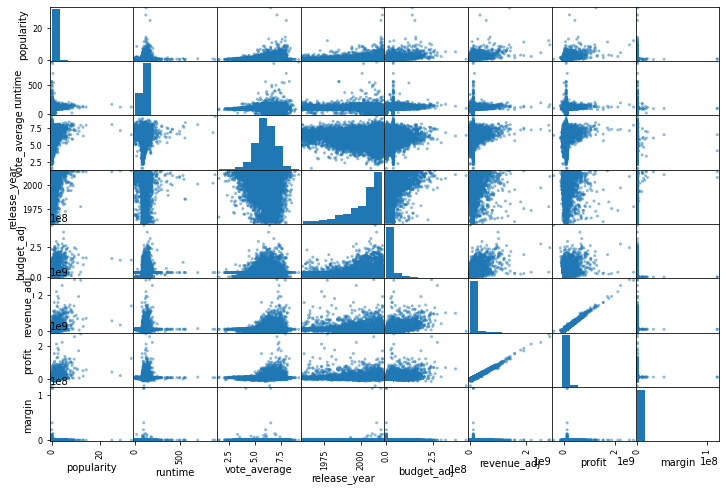

In [26]:
#Plotting the Scatter plot
pd.plotting.scatter_matrix(df,figsize=(12,8));

In [27]:
df['profit'].corr(df['revenue_adj'],method='pearson')

0.9787670039636022

#### Plotting the Correlation to visualize it.

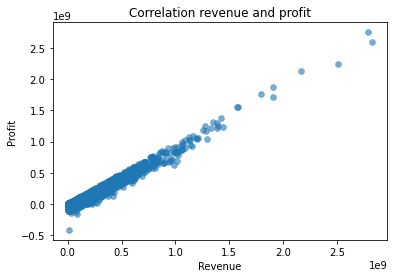

In [28]:
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.title('Correlation revenue and profit')
plt.scatter(df['revenue_adj'], df['profit'], alpha=.6, linewidths=.5)
plt.show()

__it looks like we have a strong postivive correlation between revenue and profit. which makes sense, More revenue means more profit.__

Checking some realtions between the columns.

In [29]:
#correlation between 'profit' and ('budget_adj','popularity','runtime','vote_average')
print(df['profit'].corr(df['budget_adj'],method='pearson'),
      df['profit'].corr(df['popularity'],method='pearson'),
      df['profit'].corr(df['runtime'],method='pearson'),
      df['profit'].corr(df['vote_average'],method='pearson'))

0.3388521584202161 0.46641212848459696 0.09300083212732442 0.13516106306518358


Apart from the strong positive correlation between revenue and profit. there's no sigificant correlation between the profit and  the rest of the values. \
budget_adj ,vote_average and runtime have a positive correlations with profit but not siginficant.

### Now let's answer some of the questions mentioned above.

#### Which movies has the most profit and which has the lowest?


In [30]:
df.sort_values('profit',ascending=False).groupby('original_title').head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,margin
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,7.9,1977,39575591.0,2.789712e+09,2.750137e+09,70.0
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,240886903.0,2.827124e+09,2.586237e+09,12.0
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,7.3,1997,271692064.0,2.506406e+09,2.234714e+09,9.0
10594,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122.0,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,7.2,1973,39289277.0,2.167325e+09,2.128036e+09,55.0
9806,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124.0,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,7.3,1975,28362748.0,1.907006e+09,1.878643e+09,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,1.653031,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,85.0,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,6.8,2003,118535264.0,2.960000e+02,-1.185350e+08,0.0
2435,1.189386,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,102.0,Adventure|Fantasy|Action,Touchstone Pictures,1999-08-27,6.2,1999,209448455.0,8.076712e+07,-1.286813e+08,0.0
7031,0.948560,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137.0,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,5.9,2004,167394583.0,2.980774e+07,-1.375868e+08,0.0
5508,1.214510,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149.0,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,6.0,2013,238688505.0,8.357833e+07,-1.551102e+08,0.0


### The top 5 biggest profits :
- Star Wars
- Avatar
- Titanic
- Exorcist
- Jaws

### The Bottom 5 are:
- Brother Bear
- The 13th Warrior
- The Alamo
- The Lone Ranger
- The Warrior's Way
    


***
### Runtime

In [31]:
df.sort_values('runtime',ascending=False).groupby('original_title').head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,margin
3894,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900.0,Documentary,NaN,2011-09-03,9.2,2011,36889069.0,115100888.0,7.821182e+07,3.0
4041,0.469332,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877.0,Science Fiction,DreamWorks,2002-12-02,6.8,2002,36889069.0,115100888.0,7.821182e+07,3.0
2722,0.537593,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,705.0,Action|Drama|War,HBO,2001-09-09,8.0,2001,36889069.0,153936015.0,1.170469e+08,4.0
6176,0.147489,Shoah,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,Claude Lanzmann,566.0,Documentary,British Broadcasting Corporation (BBC)|MinistÃ...,1985-11-01,8.3,1985,36889069.0,115100888.0,7.821182e+07,3.0
6181,0.000065,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,561.0,Drama|History|Western,NaN,1985-11-03,6.0,1985,36889069.0,115100888.0,7.821182e+07,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,0.306425,Luxo Jr.,NaN,John Lasseter,2.0,Animation|Family,Pixar Animation Studios,1986-08-17,7.3,1986,36889069.0,115100888.0,7.821182e+07,3.0
7905,0.647261,The Adventures of AndrÃ© and Wally B.,NaN,Alvy Ray Smith,2.0,Animation,Lucasfilm|Pixar Animation Studios,1984-12-17,5.3,1984,36889069.0,115100888.0,7.821182e+07,3.0
10754,0.002757,Bambi Meets Godzilla,NaN,Marv Newland,2.0,Animation|Comedy,NaN,2069-01-01,5.6,1969,36889069.0,115100888.0,7.821182e+07,3.0
4890,0.083202,Cousin Ben Troop Screening,Jason Schwartzman,Wes Anderson,2.0,NaN,NaN,2012-01-01,7.0,2012,36889069.0,115100888.0,7.821182e+07,3.0


### The top 5 longest runtime:
- The Story of Film: An Odyssey (900 Minutes)
- Taken (877 Minutes)
- Band of Brothers (705 Minutes)
- Shoah (566 Minutes)
- North and South, Book I (561 Minutes)

### The Shortest runtime:
- Luxo Jr. (2 Minutes) 
- The Adventures of AndrÃ© and Wally B (2 Minutes) 
- Bambi Meets Godzilla (2 Minutes) 
- Cousin Ben Troop Screening (2 Minutes) 
- Fresh Guacamole (2 Minutes) 
    


In [32]:
df.sort_values('budget_adj',ascending=False).groupby('original_title').head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,margin
2244,0.250540,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,6.4,2010,425000000.0,1.108757e+07,-4.139124e+08,0.0
3375,4.955130,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136.0,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,6.3,2011,368371256.0,9.904175e+08,6.220462e+08,3.0
7387,4.965391,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169.0,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,6.8,2007,315500575.0,1.010654e+09,6.951529e+08,3.0
6570,1.957331,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154.0,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,2006-06-28,5.3,2006,292050673.0,4.230205e+08,1.309698e+08,1.0
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,7.3,1997,271692064.0,2.506406e+09,2.234714e+09,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,0.228643,Death of a Superhero,Andy Serkis|Thomas Brodie-Sangster|Michael McE...,Ian Fitzgibbon,97.0,Animation|Drama,Bavaria Pictures|Grand Pictures|Picture Circle,2011-05-04,6.5,2011,3.0,1.151009e+08,1.151009e+08,38366963.0
1151,0.177102,Fear Clinic,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Robert Hall,95.0,Horror,Dry County Films|Anchor Bay Entertainment|Movi...,2014-10-31,4.1,2014,1.0,1.151009e+08,1.151009e+08,115100888.0
2618,0.090186,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95.0,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,4.8,1999,1.0,1.310000e+02,1.295962e+02,131.0
3065,0.472691,"Angus, Thongs and Perfect Snogging",Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...,Gurinder Chadha,100.0,Comedy|Drama|Family|Romance,Paramount Pictures|Nickelodeon Movies|Stella-d...,2008-07-25,6.5,2008,1.0,1.151009e+08,1.151009e+08,115100888.0


### The top 5 biggest budgets:
- The Warrior's Way (425 Million Dollars)
- Pirates of the Caribbean: On Stranger Tides (368 Million Dollars)
- Pirates of the Caribbean: At World's End (315 Million Dollars)
- Superman Returns (292 Million Dollars)
- Titanic (272 Million Dollars)

### The Smallest budgets :
- Death of a Superhero (3 Dollars) 
- Fear Clinic (1 Dollar) 
- Lost & Found (1 Dollar) 
- Angus, Thongs and Perfect Snogging (1 Dollar) 
- Love, Wedding, Marriage (1 Dollar) 
    

In [33]:
df.sort_values('revenue_adj',ascending=False).groupby('original_title').head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,margin
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,240886903.0,2.827124e+09,2.586237e+09,12.0
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,7.9,1977,39575591.0,2.789712e+09,2.750137e+09,70.0
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,7.3,1997,271692064.0,2.506406e+09,2.234714e+09,9.0
10594,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122.0,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,7.2,1973,39289277.0,2.167325e+09,2.128036e+09,55.0
9806,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124.0,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,7.3,1975,28362748.0,1.907006e+09,1.878643e+09,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,0.578849,Bordello of Blood,Dennis Miller|Erika Eleniak|Angie Everhart|Joh...,Gilbert Adler,87.0,Horror|Comedy,Tales From The Crypt Holdings|Universal City S...,1996-08-16,4.9,1996,20853251.0,7.000000e+00,-2.085324e+07,0.0
5162,0.208637,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15.0,Science Fiction|Animation,Studio 4Â°C,2003-06-02,6.8,2003,12.0,6.000000e+00,-5.926763e+00,0.0
3239,0.352054,Dr. Horrible's Sing-Along Blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,Joss Whedon,42.0,Adventure|Action|Comedy|Science Fiction|Music,NaN,2008-07-15,7.7,2008,202557.0,3.000000e+00,-2.025543e+05,0.0
8142,0.552091,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94.0,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,6.8,1995,8585801.0,3.000000e+00,-8.585798e+06,0.0


### The top 5 highest revenues:
- Avatar (2.827 Billion Dollars)
- Star Wars	 (2.789 Billion Dollars)
- Titanic (2.506 Billion Dollars)
- The Exorcist	 (2.167 Billion Dollars)
- Jaws (1.878 Billion Dollars)

### The lowest revenues :
- Bordello of Blood (7 Million Dollars) 
- Kid's Story	Clayton  (6 Million Dollars) 
- Dr. Horrible's Sing-Along Blog (3 Million Dollars)  
- Mallrats	 (3 Million Dollars) 
- Shattered Glass (2 Million Dollars) 

***
    

#### What's the biggest margin between revenue and profit?

In [34]:
#Top 5 movies with big margin between budget and revenue

df.sort_values('margin',ascending=False).groupby('original_title').head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,margin
1151,0.177102,Fear Clinic,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Robert Hall,95.0,Horror,Dry County Films|Anchor Bay Entertainment|Movi...,2014-10-31,4.1,2014,1.0,115100888.0,1.151009e+08,115100888.0
3065,0.472691,"Angus, Thongs and Perfect Snogging",Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...,Gurinder Chadha,100.0,Comedy|Drama|Family|Romance,Paramount Pictures|Nickelodeon Movies|Stella-d...,2008-07-25,6.5,2008,1.0,115100888.0,1.151009e+08,115100888.0
3765,0.228643,Death of a Superhero,Andy Serkis|Thomas Brodie-Sangster|Michael McE...,Ian Fitzgibbon,97.0,Animation|Drama,Bavaria Pictures|Grand Pictures|Picture Circle,2011-05-04,6.5,2011,3.0,115100888.0,1.151009e+08,38366963.0
1313,0.002922,Des Lendemains Qui Chantent,Pio MarmaÃ¯|Laetitia Casta|Ramzy Bedia|Gaspard...,Nicolas Castro,94.0,Comedy,UGC Distribution,2014-08-20,6.0,2014,5.0,115100888.0,1.151009e+08,23020178.0
3015,0.626646,Max Manus,Aksel Hennie|Agnes Kittelsen|Nicolai Cleve Bro...,Joachim RÃ¸nning|Espen Sandberg,118.0,Drama|History|War,Det Danske Filminstitut|Filmkameratene A/S|Mis...,2008-12-18,6.9,2008,8.0,115100888.0,1.151009e+08,14387611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,0.149319,Bee Season,Richard Gere|Flora Cross|Max Minghella|Kate Bo...,Scott McGehee,104.0,Drama|Family,NaN,2005-09-03,5.1,2005,15631886.0,7656262.0,-7.975624e+06,0.0
6507,0.141937,Maurice Richard,Roy Dupuis|Michel Barrette|RÃ©my Girard|Tony C...,Charles BinamÃ©,124.0,Drama,NaN,2005-10-25,5.5,2005,8932506.0,2254351.0,-6.678155e+06,0.0
3691,0.318142,Atlas Shrugged Part I,Taylor Schilling|Paul Johansson|Michael O'Keef...,Paul Johansson,97.0,Drama|Thriller|Science Fiction|Mystery,Atlas Productions,2011-04-14,4.8,2011,14540971.0,4485768.0,-1.005520e+07,0.0
3692,0.317511,The Moth Diaries,Sarah Bolger|Lily Cole|Sarah Gadon|Scott Speed...,Mary Harron,85.0,Horror,Irish Film Board,2011-09-06,5.0,2011,36889069.0,3721.0,-3.688535e+07,0.0


#### The Movie Fear Clinic made a profit of 115,100,886 dollars despite having a budget that's less than a million.

***


### Creating a dataframe of the most successful movies.
Based on what've got so far i want to create a dataframe of the most successful movies according to thier profit and the margin of budget.

In [35]:
df['margin'].median()

3.0

#### based on the previous data
The Criteria for our dataframe will be:
- Movies that made 100 Million dollars or more.
- Movies that has a 3X margin or more.


In [36]:
df.query('margin >= 3 and profit >= 100000000').groupby('original_title').head()


,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,margin
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,137999939.0,1.392446e+09,1.254446e+09,10.0
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,137999939.0,3.481613e+08,2.101614e+08,3.0
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,101199955.0,2.716190e+08,1.704191e+08,3.0
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,183999919.0,1.902723e+09,1.718723e+09,10.0
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,174799923.0,1.385749e+09,1.210949e+09,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131.0,Drama,Chenault Productions,2066-06-21,7.5,1966,50385110.0,2.266436e+08,1.762585e+08,4.0
10827,0.410366,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,Leslie H. Martinson,105.0,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,2066-07-30,5.9,1966,9256081.0,1.151009e+08,1.058448e+08,12.0
10841,0.264925,The Shooting,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,Monte Hellman,82.0,Western,Proteus Films,2066-10-23,5.5,1966,503851.0,1.151009e+08,1.145970e+08,228.0
10855,0.141026,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,Alan Rafkin,90.0,Comedy|Family|Mystery|Romance,Universal Pictures,2066-01-20,6.1,1966,4702610.0,1.151009e+08,1.103983e+08,24.0


In [37]:
hi_gain_mov = df.query('margin >= 3 and profit >= 100000000')

In [38]:
hi_gain_mov.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,profit,margin
count,1857.000000,1857.000000,1857.000000,1857.000000,1.857000e+03,1.857000e+03,1.857000e+03,1.857000e+03
mean,1.285585,106.204142,6.066290,2000.210016,3.721776e+07,2.557295e+08,2.185117e+08,2.311544e+05
std,1.929590,27.170600,1.008421,13.620988,4.919395e+07,2.577366e+08,2.266231e+08,3.993711e+06
min,0.001349,4.000000,1.500000,1960.000000,1.000000e+00,1.044501e+08,1.000062e+08,3.000000e+00
25%,0.295513,91.000000,5.500000,1993.000000,4.174486e+06,1.151009e+08,1.103463e+08,5.000000e+00
50%,0.629483,101.000000,6.200000,2005.000000,1.300000e+07,1.326487e+08,1.150451e+08,1.100000e+01
75%,1.608797,118.000000,6.800000,2011.000000,5.266490e+07,2.948042e+08,2.303020e+08,3.200000e+01
max,32.985763,705.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,1.151009e+08


### We managed to reduce the dateframe to only 1857 of movies to fit the criteria.

#### Now, let's answer some questions:

***

In [39]:
#Average budget
hi_gain_mov['budget_adj'].mean()

37217761.215939686

__The Average budget is: 37,217,761 Dollars__

In [40]:
#Average revenue_adj
hi_gain_mov['revenue_adj'].mean()

255729508.19278407

__The Average Revenue is: 255,729,508 Dollars__

In [41]:
#Average profit
hi_gain_mov['profit'].mean()

218511746.77349812

__The Average Profit is: 218,511,746 Dollars__

In [42]:
#Average runtime
hi_gain_mov['runtime'].mean()

106.20414192977711

__The Average Runetime is: 105 Minutes__
***

In [43]:
hi_gain_mov.groupby('release_year')['profit'].count().idxmax()

2013

In [44]:
hi_gain_mov.groupby('release_year')['profit'].count().max()

119

In [45]:
Most_Profitable_Years = hi_gain_mov.groupby('release_year')['profit'].count()

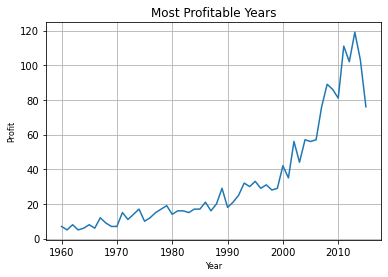

In [46]:
# plt.figure(figsize=(6,3), dpi = 110)
plt.xlabel('Year', fontsize = 8)
plt.ylabel('Profit', fontsize = 8)
plt.title('Most Profitable Years')
plt.plot(Most_Profitable_Years)
plt.grid()
plt.show()


#### 2013 Was the year that had the most successful tally of movies with a 119 movies.
***

In [47]:
#extrating the month from the release date
df['month'] = df['release_date'].dt.month

In [48]:
hi_gain_mov.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,margin
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,137999939.0,1.392446e+09,1.254446e+09,10.0
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,137999939.0,3.481613e+08,2.101614e+08,3.0
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,101199955.0,2.716190e+08,1.704191e+08,3.0
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,183999919.0,1.902723e+09,1.718723e+09,10.0
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,174799923.0,1.385749e+09,1.210949e+09,8.0


In [49]:
#getting the most profitnale month
hi_gain_mov.groupby(df['month'])['profit'].count()

month
1     123
2      97
3     132
4     129
5     182
6     198
7     155
8     125
9     173
10    179
11    145
12    219
Name: profit, dtype: int64

NameError: name 'hi_mon' is not defined

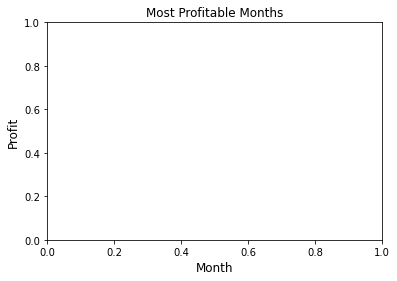

In [50]:
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Profit', fontsize = 12)
plt.title('Most Profitable Months')
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],hi_mon, width=0.7,tick_label=mon_na)
plt.grid()
plt.show()

#### It looks like 'Dec' has the most releases of our successful movies, A total of 219 movies.

In [ ]:
hi_gain_mov.describe()

***
__Which genres are the most popular?__

In [ ]:
genres = pd.Series(df['genres'].str.cat(sep = '|').split('|'))
genres.value_counts().nlargest(10)

In [ ]:
genres.value_counts(ascending=False).plot.pie(figsize=(12, 8))
plt.show()

In [ ]:
genres.value_counts(ascending=False).plot.bar(figsize=(8, 4))
plt.show()

#### The most popular genre is Drama with 4760 movies followed by Comedy with 3793 movies.

***
#### Which director makes the most profitable movies?



In [ ]:
hi_gain_mov['director'].value_counts(ascending = False).head(15)

#### The Director that has the most profitable movies to his name is: Steven Spielberg with 22 movies.
****

In [ ]:
dir_lst = pd.Series(hi_gain_mov['production_companies'].str.cat(sep = '|').split('|'))
dir_lst.value_counts(ascending = False).head(15)

#### The Production Company that made the most profitable movies is: Universal Pictures with 123 movies.


In [ ]:
act_lst = pd.Series(hi_gain_mov['cast'].str.cat(sep = '|').split('|'))
act_lst.value_counts(ascending = False).head(15)


__The Actor that is assosiated with the most profitable movies is: Tom Cruise with 22 movies.
Followed by Samuel L. Jackson and Bruce Willis, Both have 20 movies to thier name.__

<a id='conclusions'></a>
## Conclusions and Summary

#### Based on my analysis

### The top 5 biggest profits :
- Star Wars
- Avatar
- Titanic
- Exorcist
- Jaws

### The Bottom 5 are:
- Brother Bear
- The 13th Warrior
- The Alamo
- The Lone Ranger
- The Warrior's Way
    
### The top 5 longest runtime:
- The Story of Film: An Odyssey (900 Minutes)
- Taken (877 Minutes)
- Band of Brothers (705 Minutes)
- Shoah (566 Minutes)
- North and South, Book I (561 Minutes)

### The Shortest runtime:
- Luxo Jr. (2 Minutes) 
- The Adventures of AndrÃ© and Wally B (2 Minutes) 
- Bambi Meets Godzilla (2 Minutes) 
- Cousin Ben Troop Screening (2 Minutes) 
- Fresh Guacamole (2 Minutes) 
    

### The top 5 biggest budgets:
- The Warrior's Way (425 Million Dollars)
- Pirates of the Caribbean: On Stranger Tides (368 Million Dollars)
- Pirates of the Caribbean: At World's End (315 Million Dollars)
- Superman Returns (292 Million Dollars)
- Titanic (272 Million Dollars)

### The Smallest budgets :
- Death of a Superhero (3 Dollars) 
- Fear Clinic (1 Dollar) 
- Lost & Found (1 Dollar) 
- Angus, Thongs and Perfect Snogging (1 Dollar) 
- Love, Wedding, Marriage (1 Dollar) 
    

### The top 5 highest revenues:
- Avatar (2.827 Billion Dollars)
- Star Wars	 (2.789 Billion Dollars)
- Titanic (2.506 Billion Dollars)
- The Exorcist	 (2.167 Billion Dollars)
- Jaws (1.878 Billion Dollars)

### The lowest revenues :
- Bordello of Blood (7 Million Dollars) 
- Kid's Story	Clayton  (6 Million Dollars) 
- Dr. Horrible's Sing-Along Blog (3 Million Dollars)  
- Mallrats	 (3 Million Dollars) 
- Shattered Glass (2 Million Dollars) 

***

#### Fun Fact: The Movie Fear Clinic made a profit of 115,100,886 dollars despite having a budget that's less than a million.

***

### From our dataframe of the most profitable movies:

__- The Average budget is: 37,217,761 Dollars__

__- The Average Revenue is: 255,729,508 Dollars__

__- The Average Profit is: 218,511,746 Dollars__

__- The Average Runetime is: 105 Minutes__
***

#### 2013 Was the year that had the most successful tally of movies with a 119 movies.


#### The most popular genre is Drama with 4760 movies followed by Comedy with 3793 movies.


#### The Director that has the most profitable movies to his name is: Steven Spielberg with 22 movies.
****

#### The Production Company that made the most profitable movies is: Universal Pictures with 123 movies.


***

#### Resources

Links:\
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
https://www.geeksforgeeks.org/python-pandas-dataframe-corr/#:~:text=corr()%20is%20used%20to,the%20Dataframe%2C%20it%20is%20ignored.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html
https://stackoverflow.com/questions/27842613/pandas-groupby-then-sort-within-groups
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html#pandas.Series.dt.month
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.htmlhttps://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column


